<a href="https://colab.research.google.com/github/nyunu/IT_DataMining/blob/main/IT%EC%99%80_%EB%B9%84%EC%A6%88%EB%8B%88%EC%8A%A4_%ED%98%81%EC%8B%A0_%EA%B8%B0%EB%A7%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Company Bankruptcy Prediction**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame, Series

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data.csv")
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [ ]:
df.columns = df.columns.str.replace(' ','_')

# **EDA** 

## **데이터 확인**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1   _ROA(C)_before_interest_and_depreciation_before_interest  6819 non-null   float64
 2   _ROA(A)_before_interest_and_%_after_tax                   6819 non-null   float64
 3   _ROA(B)_before_interest_and_depreciation_after_tax        6819 non-null   float64
 4   _Operating_Gross_Margin                                   6819 non-null   float64
 5   _Realized_Sales_Gross_Margin                              6819 non-null   float64
 6   _Operating_Profit_Rate                                    6819 non-null   float64
 7   _Pre-tax_net_Interest_Rate                                6819 non-null   float64
 8   _After-tax_net_Int

In [ ]:
df.shape

(6819, 96)

In [ ]:
df.describe(include='all')

,Bankrupt?,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,...,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Net_Income_Flag,_Equity_to_Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


## **Y값 확인**
데이터 불균형 발생 -> 처리 필요

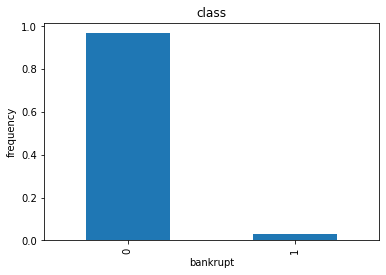

In [ ]:
df["Bankrupt?"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class")

In [ ]:
df["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## **결측치 확인**
결측치 없음

In [ ]:
df.columns[df.isna().any()]

Index([], dtype='object')

## **범주형 / 연속형 변수 쪼개기**

In [ ]:
def get_variable_types(df: DataFrame) -> dict:
    variable_types: dict = {
        'Numeric': [],
        'Binary': [],
        'Date': [],
        'Symbolic': []
    }
    for c in df.columns:
        uniques = df[c].dropna(inplace=False).unique()
        if len(uniques) == 2:
            variable_types['Binary'].append(c)
            df[c].astype('bool')
        elif len(uniques) == 1:
            variable_types['Binary'].append(c)
            df[c].astype('bool')
        elif df[c].dtype == 'datetime64':
            variable_types['Date'].append(c)
        elif df[c].dtype == 'int':
            variable_types['Numeric'].append(c)
        elif df[c].dtype == 'float':
            variable_types['Numeric'].append(c)
        else:
            df[c].astype('category')
            variable_types['Symbolic'].append(c)

    return variable_types

## **범주형 변수 확인**

In [ ]:
bi_value = get_variable_types(df)['Binary']
bi_df = df[bi_value]
bi_df.head()

,Bankrupt?,_Liability-Assets_Flag,_Net_Income_Flag
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [ ]:
bi_df['_Liability-Assets_Flag'].value_counts()

0    6811
1       8
Name: _Liability-Assets_Flag, dtype: int64

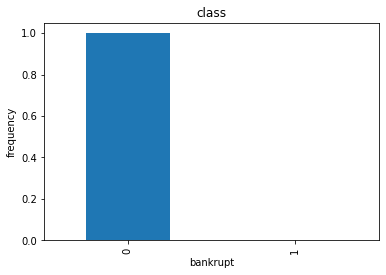

In [ ]:
df["_Liability-Assets_Flag"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class")

In [ ]:
bi_df['_Net_Income_Flag'].value_counts()

1    6819
Name: _Net_Income_Flag, dtype: int64

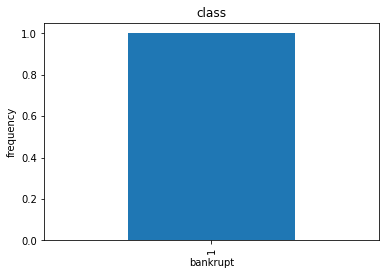

In [ ]:
df["_Net_Income_Flag"].value_counts(normalize=True).plot(
    kind="bar",
    xlabel="bankrupt",
    ylabel="frequency",
    title="class")

## **연속형 변수 확인**

In [ ]:
variables = get_variable_types(df)['Numeric']
numeric_df = df[variables]
numeric_df.head()

,_ROA(C)_before_interest_and_depreciation_before_interest,_ROA(A)_before_interest_and_%_after_tax,_ROA(B)_before_interest_and_depreciation_after_tax,_Operating_Gross_Margin,_Realized_Sales_Gross_Margin,_Operating_Profit_Rate,_Pre-tax_net_Interest_Rate,_After-tax_net_Interest_Rate,_Non-industry_income_and_expenditure/revenue,_Continuous_interest_rate_(after_tax),...,_Current_Liability_to_Current_Assets,_Net_Income_to_Total_Assets,_Total_assets_to_GNP_price,_No-credit_Interval,_Gross_Profit_to_Sales,_Net_Income_to_Stockholder's_Equity,_Liability_to_Equity,_Degree_of_Financial_Leverage_(DFL),_Interest_Coverage_Ratio_(Interest_expense_to_EBIT),_Equity_to_Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


### 히스토그램

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8935226f10>,
      dtype=object)

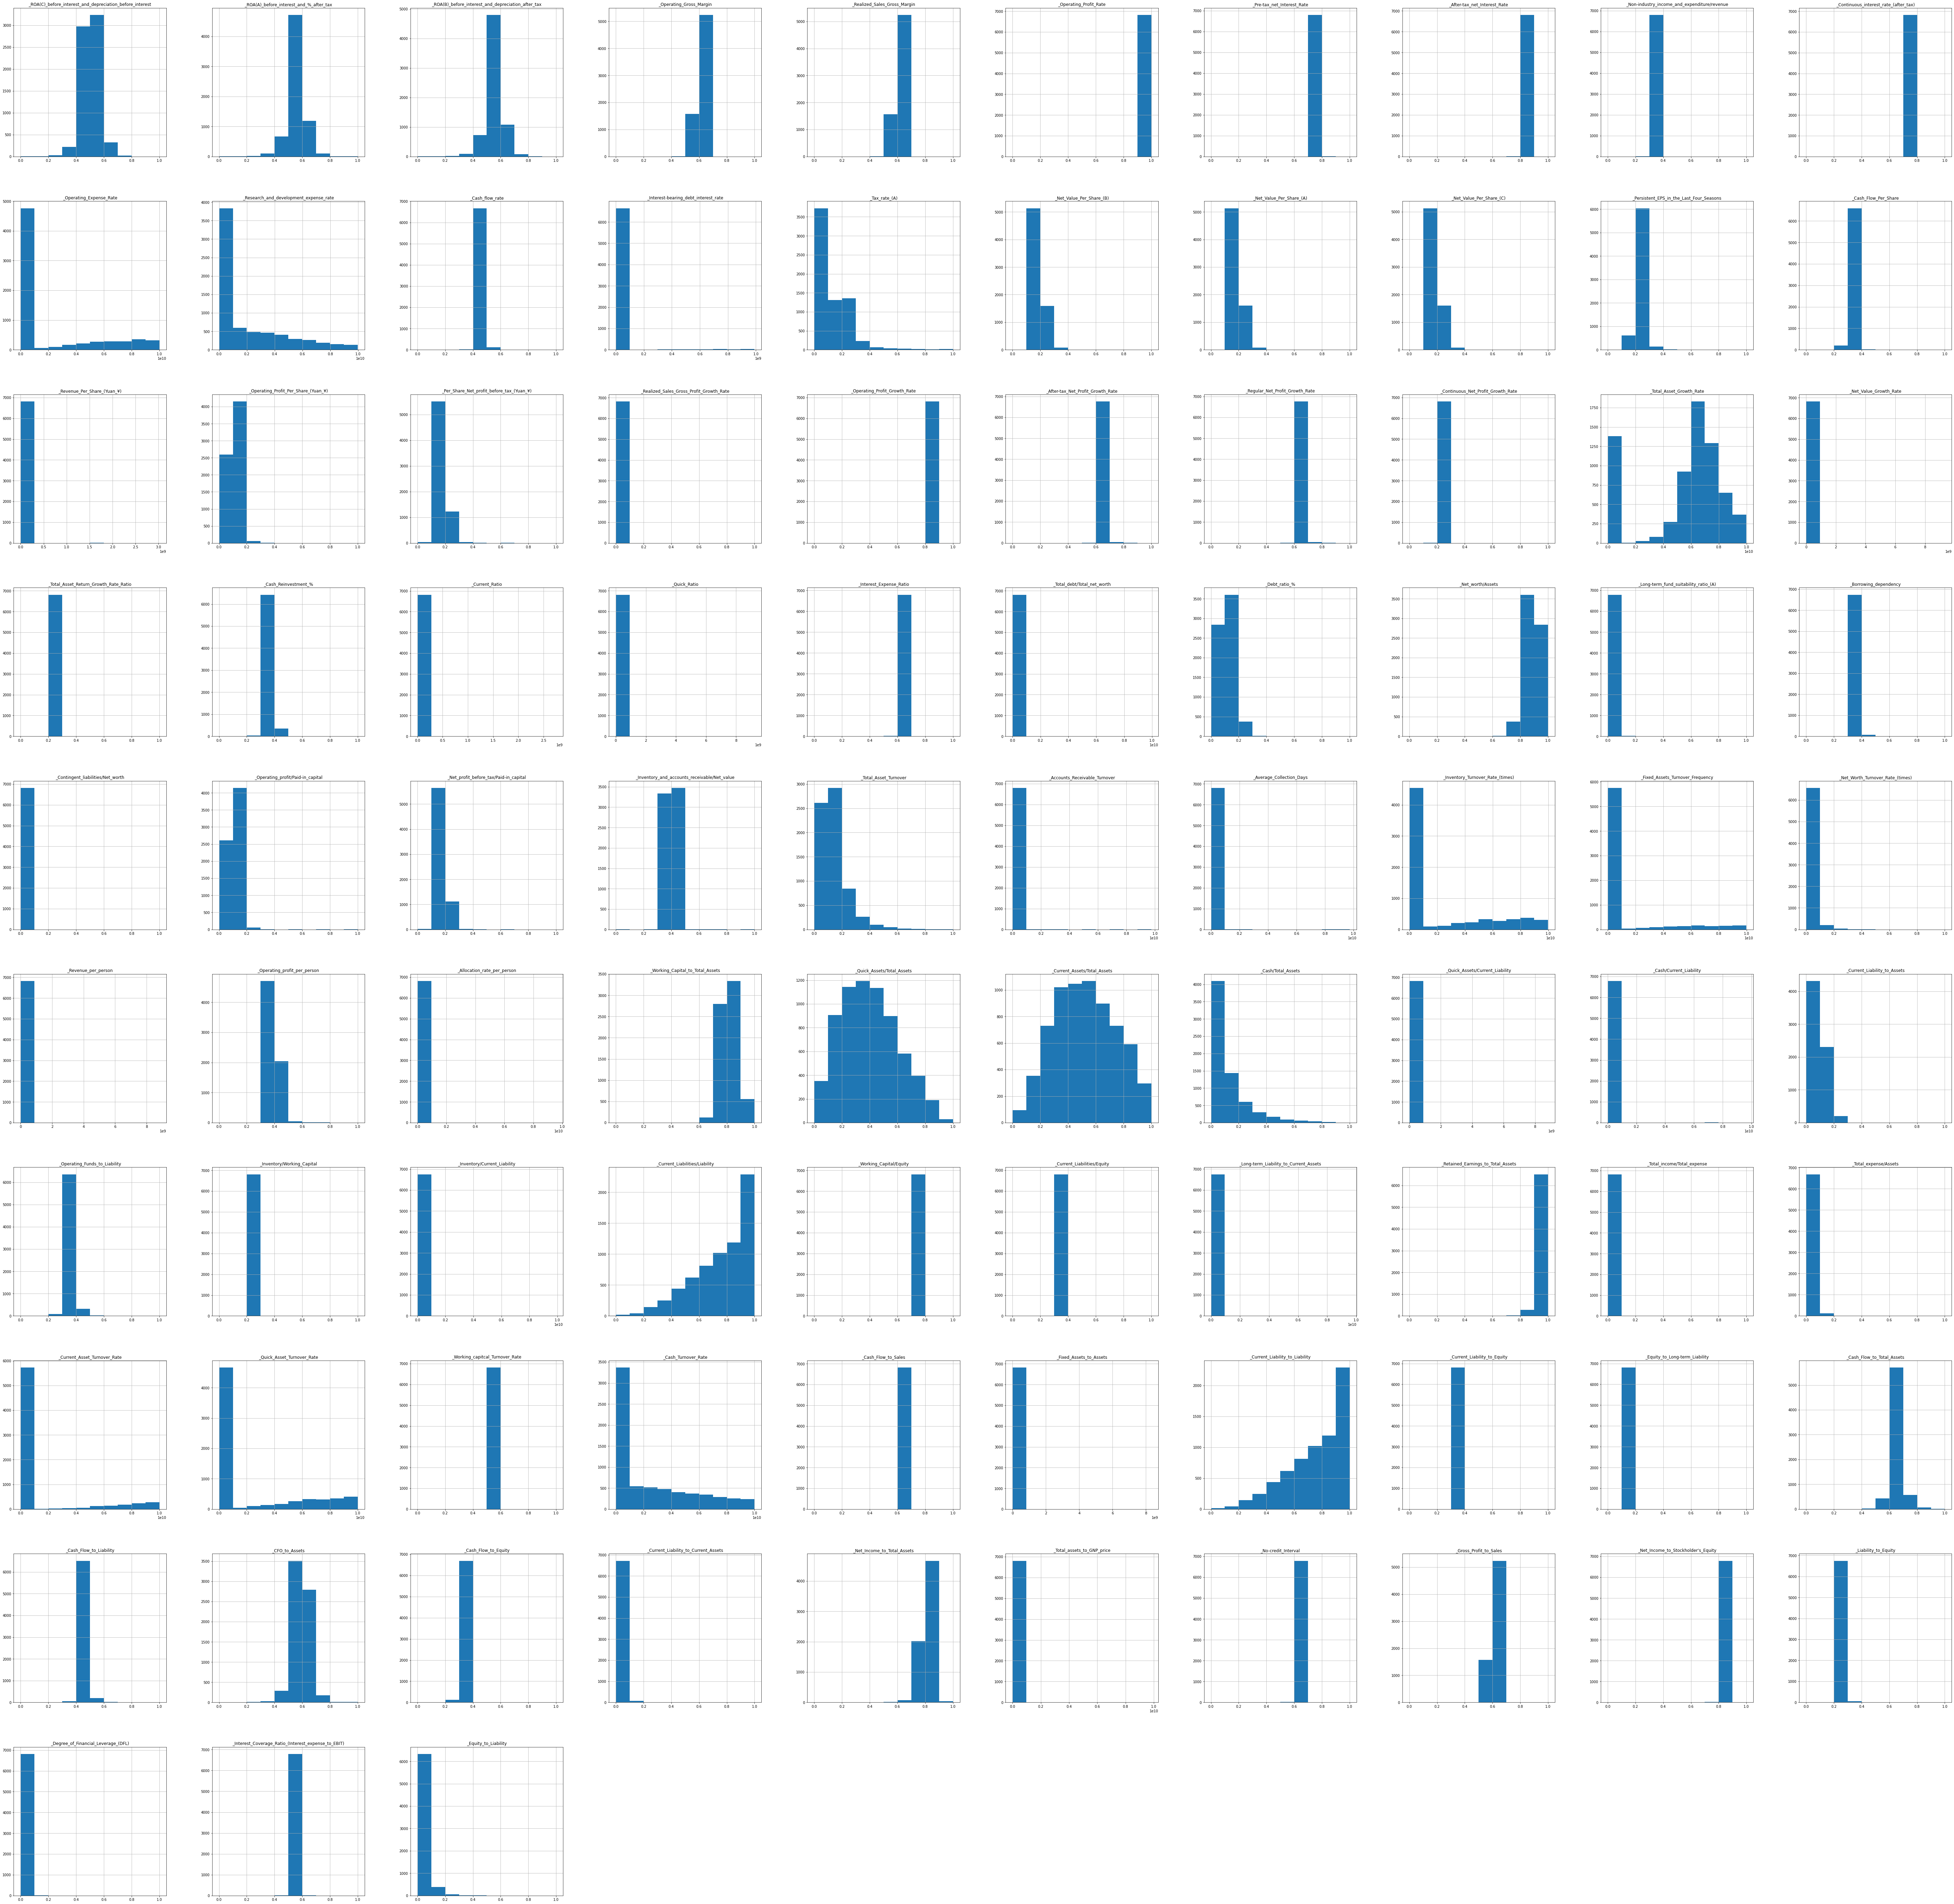

In [ ]:
numeric_df.hist(figsize = (100,100))

### **상관관계 히트맵**

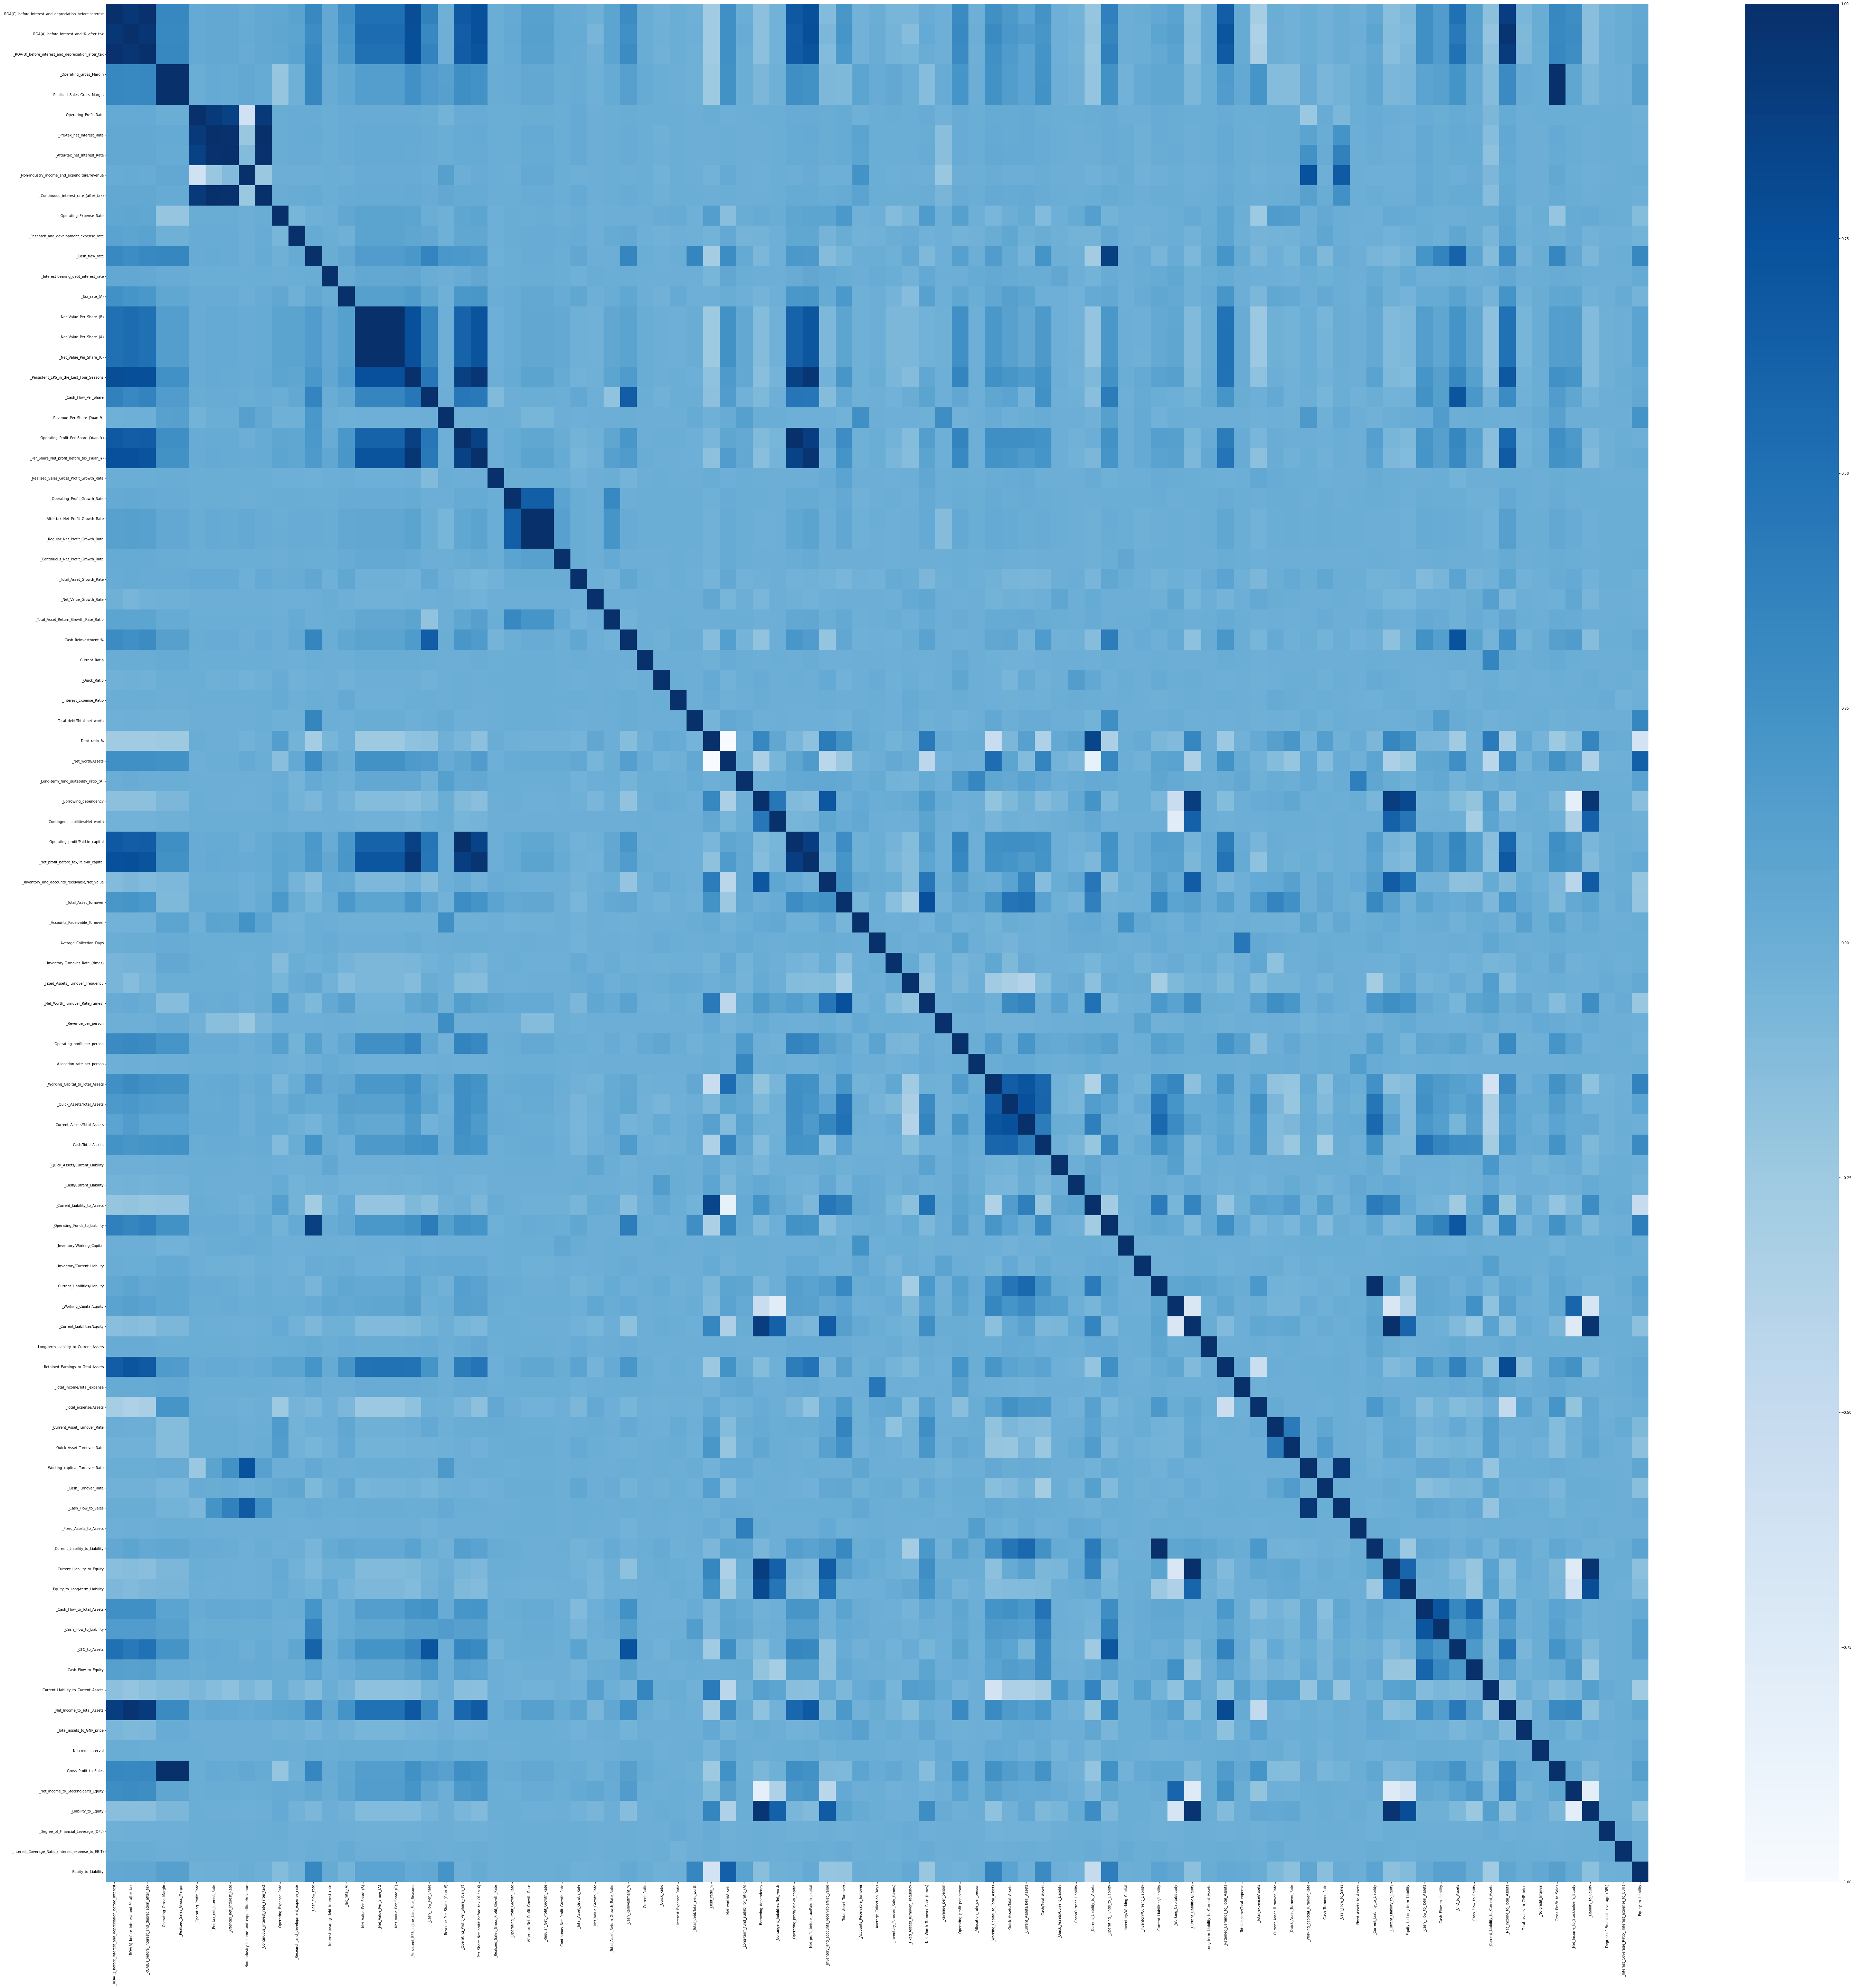

In [ ]:
variables.append('Bankrupt?')

plt.figure(figsize = (100,100))
sns.heatmap(numeric_df.corr(), cmap = "Blues")

# **전처리**

## **범주형 변수 삭제**

In [ ]:
df.drop(['_Liability-Assets_Flag','_Net_Income_Flag'], axis = 1, inplace = True)

## **이상치 처리**

In [ ]:
def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    feat_iqr = q75 - q25
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    
    return dataset

for col in df:
    new_df = outliers_removal(df[col],str(col),df)

## **상관관계 0.9 이상인 변수 삭제**


In [ ]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [ ]:
cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool)) #

dropped_cols = set()
for feature in upper_tri.columns:
    if any(upper_tri[feature] > 0.9): # feature로 들어온 변수와의 상관관계가 0.9 이상인게 하나라도 있으면
        dropped_cols.add(feature) # 해당 feature를 dropped_cols set에 포함시킴 (set의 특성상 중복이 제거되며 추가)

In [ ]:
# 상관관계 0.9 이상이 존재하는 변수 전체 삭제
X = X.drop(dropped_cols,axis=1)

## **데이터 표준화**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = scaler.fit_transform(X)
X = pd.DataFrame(df_std, columns = X.columns)

## **데이터 불균형 처리**

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X, y)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X.shape, y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_sm.shape, y_sm.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_sm).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (6819, 74) (6819,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (13198, 74) (13198,)
SMOTE 적용 후 값의 분포 :
 1    6599
0    6599
Name: Bankrupt?, dtype: int64


# **모델링**

In [ ]:
print(X_sm.shape)
print(y_sm.shape)

(13198, 74)
(13198,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, stratify = y_sm) # 데이터 분할

## **1. SVM**

best parameters: 
{'SVM__C': 10, 'SVM__gamma': 0.1, 'SVM__kernel': 'rbf'}
f1 score is 0.99 
Precision: 0.99
Recall: 0.98
Precision: 0.99


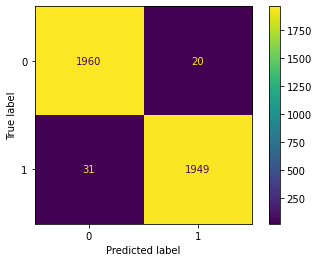

In [ ]:
sw_train = class_weight.compute_sample_weight(class_weight = 'balanced', y = y_train) 
    
steps = [('SVM', SVC(cache_size=7000))]
pipeline = Pipeline(steps)
    
param_grid = {
  'SVM__C':[0.01,0.1,1,10],
  'SVM__gamma':[0.1,0.01,0.001,0.0001],
  'SVM__kernel':['rbf']}
    
f1 = make_scorer(f1_score)
grid = GridSearchCV(pipeline,param_grid=param_grid, cv=5, scoring=f1, verbose=0) 
grid.fit(X_train, y_train, SVM__sample_weight = sw_train)
    
print("best parameters: ")
print(grid.best_params_)
    
model = grid.best_estimator_
y_pred = model.predict(X_test)
    
print("f1 score is %.2f "%f1_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
plot_confusion_matrix(model, X_test,  y_test, values_format='d')

## **2. RandomForestClassifier**

best parameters: 
{'max_depth': 12, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 100}
f1 score is 0.97 
Precision: 0.95
Recall: 1.00
Precision: 0.95


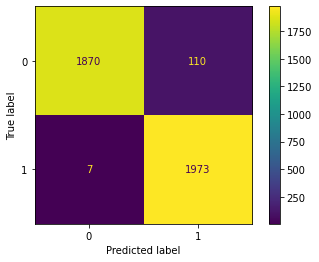

In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid ={
    'n_estimators':[100, 200],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[3, 5, 7, 9],
    'min_samples_split':[3, 7, 11, 15]}
    
rf = RandomForestClassifier(random_state = 0)
f1 = make_scorer(f1_score)
grid = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring=f1, verbose=0) 
grid.fit(X_train, y_train)
    
print("best parameters: ")
print(grid.best_params_)
    
model = grid.best_estimator_
y_pred = model.predict(X_test)
    
print("f1 score is %.2f "%f1_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, values_format='d')

## **3. Adaboost**

best parameters: 
{'learning_rate': 1.0, 'n_estimators': 100}
f1 score is 0.94 
Precision: 0.92
Recall: 0.95
Precision: 0.92


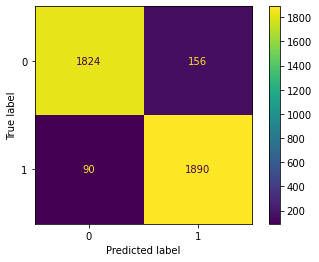

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_grid ={
    'n_estimators':[30, 50, 70, 100],
    'learning_rate':[0.1, 0.5, 1.0, 1.5]}

ada = AdaBoostClassifier()
f1 = make_scorer(f1_score)
grid = GridSearchCV(ada, param_grid=param_grid, cv=5, scoring=f1, verbose=0) 
grid.fit(X_train, y_train)
    
print("best parameters: ")
print(grid.best_params_)
    
model = grid.best_estimator_
y_pred = model.predict(X_test)
    
print("f1 score is %.2f "%f1_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, values_format='d')

## **4. Gradient Boosting**

best parameters: 
{'learning_rate': 0.5, 'n_estimators': 100}
f1 score is 0.98 
Precision: 0.96
Recall: 0.99
Precision: 0.96


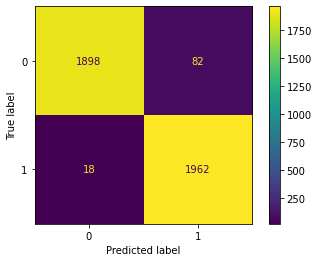

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters = {
    'max_depth':[1,2,3,4,5], 
    'learning_rate':[0.1,0.08, 0.06, 0.04, 0.02]}

gb = GradientBoostingClassifier(random_state=0)
f1 = make_scorer(f1_score)
grid = GridSearchCV(gb, param_grid=param_grid, cv=5, scoring=f1, verbose=0)
grid.fit(X_train, y_train)

print("best parameters: ")
print(grid.best_params_)
    
model = grid.best_estimator_
y_pred = model.predict(X_test)
    
print("f1 score is %.2f "%f1_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
print("Recall: %.2f" %recall_score(y_test, y_pred))
print("Precision: %.2f" %precision_score(y_test, y_pred))
plot_confusion_matrix(model, X_test, y_test, values_format='d')

# **최종모델**
## **Gradient Boost Machine 채택**
**채택이유** : f1-score 기준으로 본다면 SVM의 성능이 가장 좋게 나왔으나, 프로젝트의 목적이 파산에 어떤 요인들이 영향을 미치는지 파악하고 시사점을 도출하는 것이기에 어떠한 요인으로 인해 파산으로, 혹은 비파산으로 분류되었는지 알 수 없는 SVM보다는 feature_importance를 확인할 수 있는 tree기반 모델이 더욱 적합하다고 생각됨. 보통 SVM은 현재 분류기법 중 최상의 기법으로 평가받고 있기에 해당 모델의 f1-score를 기준으로 가장 차이가 적게 나는 모델을 선정하고자 함. 따라서, SVM과 0.01의 차이밖에 나지 않고 tree 기반의 모델인 GBM을 최종 모델로 선정.

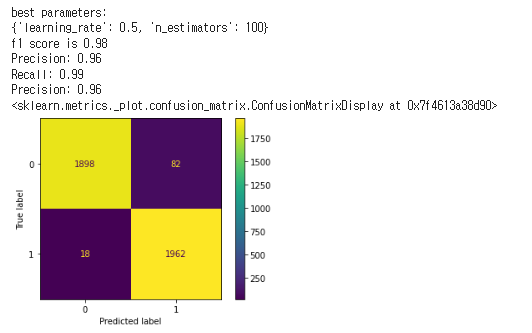

## **feature importance**
GradientBoostClassifier model의 결과를 이용하여 feature importance 확인 <br>

In [ ]:
ft_importance_values = model.feature_importances_

ft_series = pd.Series(ft_importance_values, index = X_train.columns)
ft_top20 = ft_series.sort_values(ascending=False)[:20]

ft_top20

_Persistent_EPS_in_the_Last_Four_Seasons                    0.371751
_Non-industry_income_and_expenditure/revenue                0.119216
_Debt_ratio_%                                               0.081797
_Borrowing_dependency                                       0.075490
_Interest_Expense_Ratio                                     0.048135
_Operating_profit_per_person                                0.035283
_Net_Income_to_Stockholder's_Equity                         0.030678
_Cash_Turnover_Rate                                         0.027721
_Current_Liability_to_Assets                                0.020919
_Total_income/Total_expense                                 0.019426
_Inventory/Working_Capital                                  0.016429
_Contingent_liabilities/Net_worth                           0.015307
_Equity_to_Long-term_Liability                              0.011512
_Fixed_Assets_Turnover_Frequency                            0.009114
_ROA(C)_before_interest_and_deprec

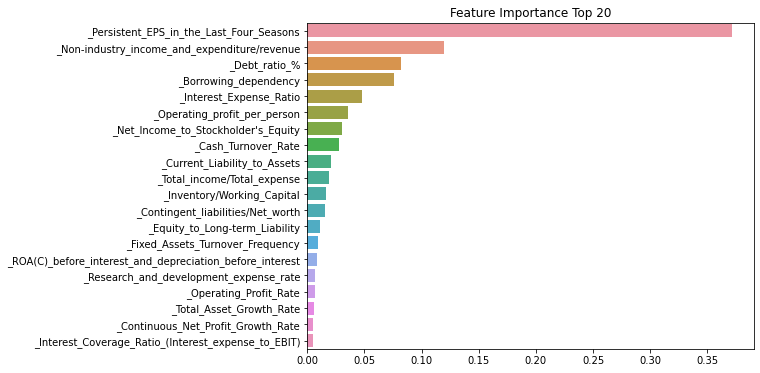

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Feature Importance Top 20')
sns.barplot(x=ft_top20, y=ft_top20.index)
plt.show()

## **ROC curve**

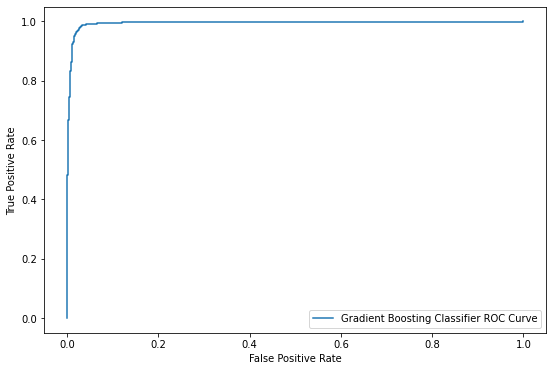

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr_gbm, tpr_gbm, cutoff_gbm = roc_curve(y_test, grid.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr_gbm, tpr_gbm, label="Gradient Boosting Classifier ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend(loc=4)
plt.show() 

In [ ]:
auc_gbm = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("Gradient Boosting Machine의 AUC : {:.3f}".format(auc_gbm))

Gradient Boosting Machine의 AUC : 0.995
